Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Smallest k-means inertia value for k=5: 924.3159961688092


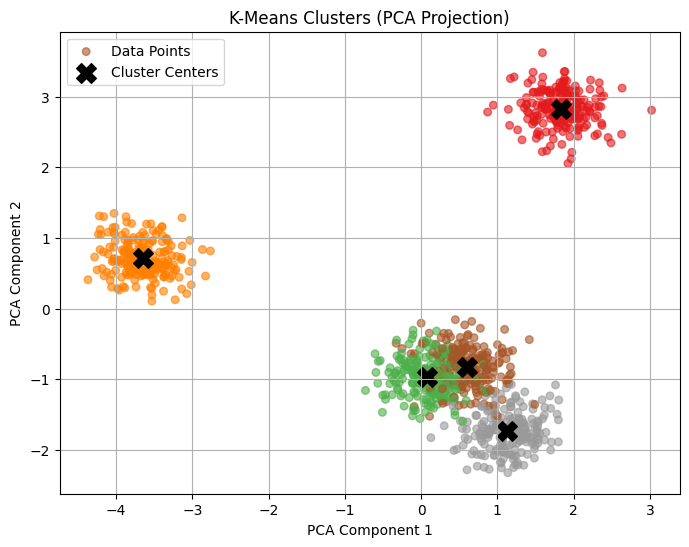

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# k-means with k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
y_predict = kmeans.fit_predict(X)
#is this the smallest though? need to check
inertia = kmeans.inertia_
print("Smallest k-means inertia value for k=5: " + str(inertia))

# 2D visualization via PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

#plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_predict, cmap='Set1', s=30, alpha=0.6, label='Data Points')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

#confusion matrix
conf_matrix = confusion_matrix(y_true, y_predict)


# 2. Clustering Fashion-MNIST using $k$-means

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


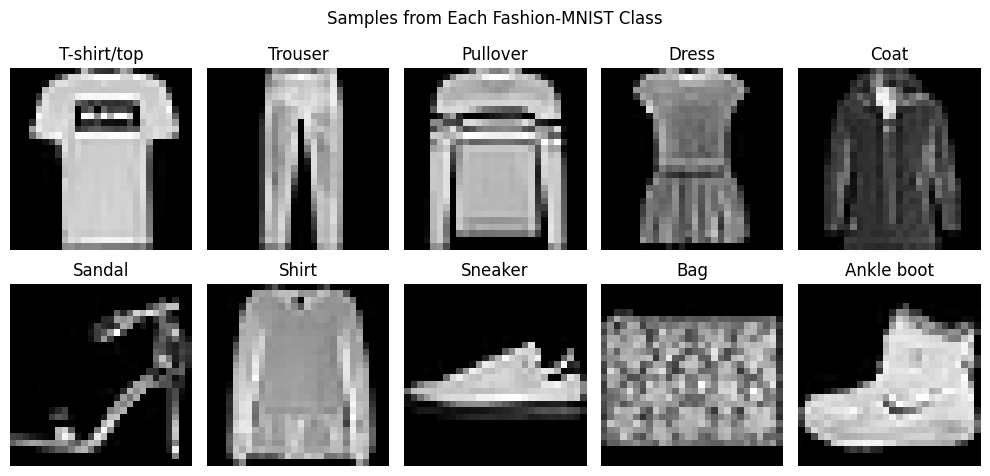

Original shape: (70000, 784)
Shape after PCA: (70000, 50)
Inertia value for k=10: 19994037.734896205
Explained variance (sum): 0.8010697690788376
Silhouette score: 0.16612614572581816


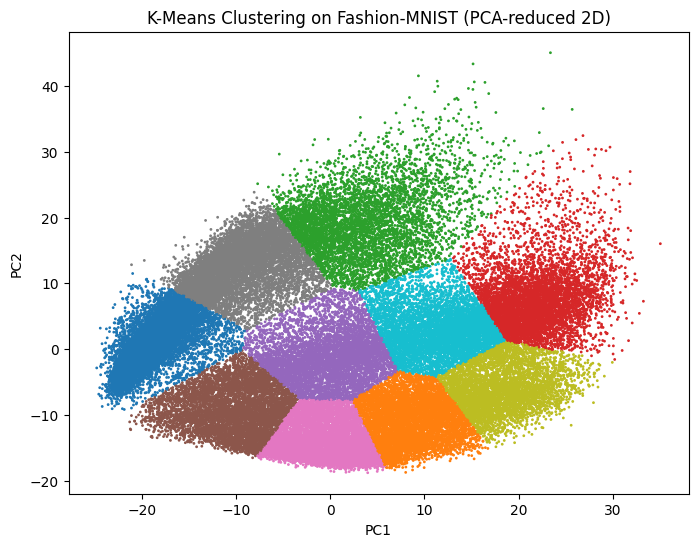

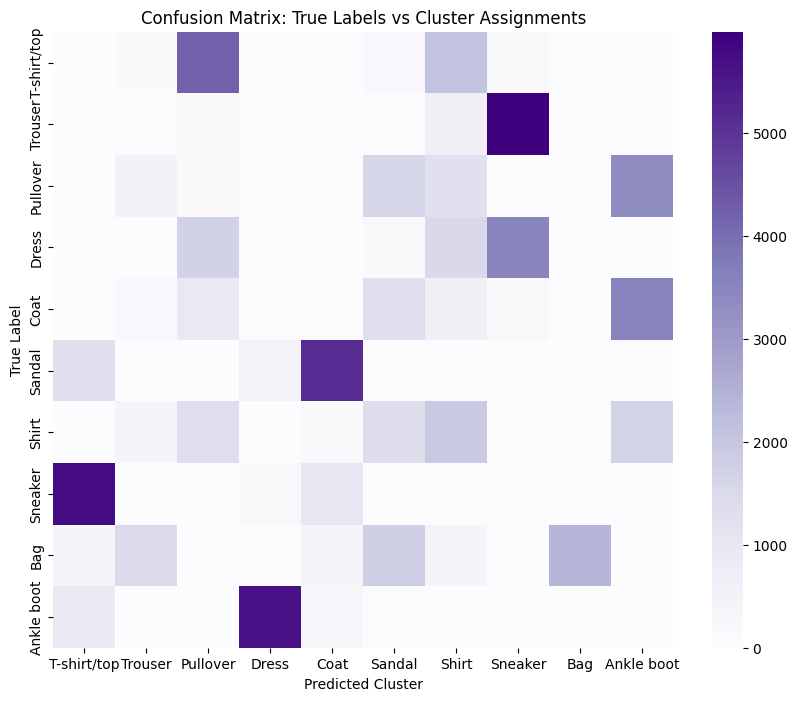

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Array of figures
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))
for label in range(10):
  idx = np.where(y == label)[0][0]
  image = X[idx].reshape(28, 28)
  plt.subplot(2, 5, label + 1)
  plt.imshow(image, cmap='gray')
  plt.title(class_names[label])
  plt.axis('off')

plt.suptitle("Samples from Each Fashion-MNIST Class")
plt.tight_layout()
plt.show()

# Dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=125, random_state=1)
X_pca = pca.fit_transform(X_scaled)
print("Original shape:", X.shape)
print("Shape after PCA:", X_pca.shape)

#k-means
k = 10
kmeans = KMeans(n_clusters=k, random_state=1)
y_predict = kmeans.fit_predict(X_pca)
inertia = kmeans.inertia_
print("Inertia value for k=10: " + str(inertia))
print("Explained variance (sum):", np.sum(pca.explained_variance_ratio_))
score = silhouette_score(X_pca, y_predict)
print("Silhouette score:", score)

#pca visualization
pca_2d = PCA(n_components=2, random_state=1)
X_2d = pca_2d.fit_transform(X_scaled)

kmeans_2d = KMeans(n_clusters=10, random_state=1)
y_kmeans_2d = kmeans_2d.fit_predict(X_2d)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_kmeans_2d, cmap='tab10', s=1)
plt.title("K-Means Clustering on Fashion-MNIST (PCA-reduced 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#confusion matrix
conf_matrix = confusion_matrix(y, y_predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, cmap='Purples', fmt='d')
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.title("Confusion Matrix: True Labels vs Cluster Assignments")
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here